#### Mempersiapkan Library

In [1]:
import pandas as pd
import numpy as np
import csv
import re
from string import punctuation
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

#### Mempersiapkan Dataset

In [2]:
tsv_file_path = "train_preprocess.tsv.txt"

data_text = []
label = []

with open(tsv_file_path, encoding='utf-8') as tsvfile:
    tsv_reader = csv.reader(tsvfile, delimiter='\t')
    for row in tsv_reader:
        data_text.append(row[0])
        label.append(row[1])

df = pd.DataFrame({'data_text': data_text, 'label': label})

In [3]:
df

,data_text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [4]:
df['len_data_text'] = df['data_text'].apply(lambda x: len(x.split()))

In [5]:
df

,data_text,label,len_data_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10995,tidak kecewa,positive,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10997,hormati partai-partai yang telah berkoalisi,neutral,5
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


In [6]:
df.loc[df['len_data_text'] <= 3]

,data_text,label,len_data_text
9,bersyukur,positive,1
46,tidak memuaskan,negative,2
69,marah,negative,1
180,mengagumi,positive,1
181,tidak hebat,negative,2
...,...,...,...
10927,tidak indah,negative,2
10943,puas,positive,1
10972,tidak jahat,positive,2
10994,tidak bosan,positive,2


In [7]:
df = df.drop(df.index[df['len_data_text'] <= 10], axis=0)

In [8]:
df.loc[df['len_data_text'] <= 11]

,data_text,label,len_data_text
62,"jangan terlalu banyak iklan , perbaiki dulu ja...",negative,11
98,"hasil quick count pilgub kaltim 2018 , isran -...",neutral,11
118,cha-cha itu makanan ringan terenak dan tepat b...,positive,11
122,fadli zon anjing kau . tidak usah kau sok polos .,negative,11
345,"usung dedi mulyadii , golkar rayu pdip , demok...",neutral,11
...,...,...,...
10706,pagi ini lagi marah sama indosat karena kuota ...,negative,11
10789,tim sukses asik masih tunggu hasil resmi kpu j...,neutral,11
10821,tidak untung saya ikut romobongan untuk pergi ...,negative,11
10850,nyesel deh ganti mending yang kemarin deh indi...,negative,11


In [9]:
df

,data_text,label,len_data_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,49
10990,datang ke sini sore hari pakai baju agak tebal...,positive,23
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


In [10]:
train_data, test_data = train_test_split(df, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

In [11]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(5968, 3)
(1866, 3)
(1492, 3)


In [12]:
print('Komposisi Label train_data:')
print(train_data['label'].value_counts())

print('Komposisi Label test_data:')
print(test_data['label'].value_counts())

print('Komposisi Label val_data:')
print(val_data['label'].value_counts())

Komposisi Label train_data:
positive    3836
negative    1679
neutral      453
Name: label, dtype: int64
Komposisi Label test_data:
positive    1174
negative     543
neutral      149
Name: label, dtype: int64
Komposisi Label val_data:
positive    985
negative    401
neutral     106
Name: label, dtype: int64


#### Normalisasi Text

In [13]:
def lowercasing(paragraph):
    return paragraph.lower()

In [14]:
def menghilangkan_tandabaca(paragraph):
    new_paragraph = re.sub(fr'[{punctuation}]', r'', paragraph)
    return new_paragraph

In [15]:
def text_normalization(paragraph):
    paragraph = lowercasing(paragraph)
    paragraph = menghilangkan_tandabaca(paragraph)
    paragraph = re.sub(r"[ ]+",r' ',paragraph)
    return paragraph

In [16]:
train_data['data_text'] = train_data['data_text'].apply(lambda x: text_normalization(x))
test_data['data_text'] = test_data['data_text'].apply(lambda x: text_normalization(x))
val_data['data_text'] = val_data['data_text'].apply(lambda x: text_normalization(x))

#### Training Model

In [17]:
tokenizer = Tokenizer(oov_token='<UNK>')

In [18]:
tokenizer.fit_on_texts(train_data['data_text'])

In [19]:
train_data_tf = tokenizer.texts_to_sequences(train_data['data_text'])
test_data_tf = tokenizer.texts_to_sequences(test_data['data_text'])
val_data_tf = tokenizer.texts_to_sequences(val_data['data_text'])

In [20]:
train_data_tf

[[306, 6, 580, 457, 3, 398, 13, 3818, 304, 6776, 1234],
 [23,
  2,
  19,
  26,
  4,
  950,
  328,
  18,
  2,
  15,
  19,
  122,
  1484,
  51,
  3,
  1123,
  1751,
  1235,
  3,
  11,
  4,
  46,
  2,
  142],
 [3819,
  661,
  36,
  60,
  85,
  9,
  5,
  6777,
  1752,
  6,
  920,
  214,
  1753,
  742,
  219,
  1180,
  30,
  134,
  153,
  270,
  4,
  149,
  9,
  2,
  11,
  96,
  186,
  3820,
  4,
  404,
  19,
  225],
 [23,
  9,
  3,
  6778,
  271,
  2019,
  2019,
  2,
  3,
  37,
  231,
  16,
  3,
  3821,
  69,
  41,
  247,
  13,
  386,
  1124],
 [204, 7, 2212, 1005, 226, 231, 2733, 710, 243, 363, 4776, 38, 292],
 [65,
  64,
  84,
  31,
  56,
  1754,
  80,
  14,
  5,
  261,
  30,
  7,
  69,
  31,
  56,
  527,
  1181,
  673,
  31,
  400,
  528,
  16,
  4777,
  3,
  19,
  1485,
  25,
  62,
  47],
 [86,
  8,
  87,
  3,
  921,
  7,
  71,
  98,
  4,
  7,
  71,
  156,
  18,
  922,
  163,
  8,
  294,
  138,
  2,
  811,
  2,
  11],
 [566,
  2,
  106,
  165,
  2,
  117,
  1005,
  61,
  441,
  61,
  2

In [21]:
train_data['data_text']

10419    akhirnya saya menemukan cara yang tepat untuk ...
8797     menu nya sangat banyak dan menggugah selera ha...
9095     ayah ibu kami suka pesan makanan di aini tadin...
9496     menu makanan yang waow terutama zupa zupa nya ...
3381     jokowi tidak bertanggung jawab jakarta belum b...
                               ...                        
8584     harga motor indonesia terlalu mahal di banding...
2545     sama sih mau nya makan indomie sebulan sekali ...
1949     jangan pilih pemimpin dari keturunan china kar...
6230     tiap belanja bulanan di supermarket awal nya i...
6483     sekjen pdip kami pernah diintervensi tapi tak ...
Name: data_text, Length: 5968, dtype: object

In [22]:
train_data_tf[0]

[306, 6, 580, 457, 3, 398, 13, 3818, 304, 6776, 1234]

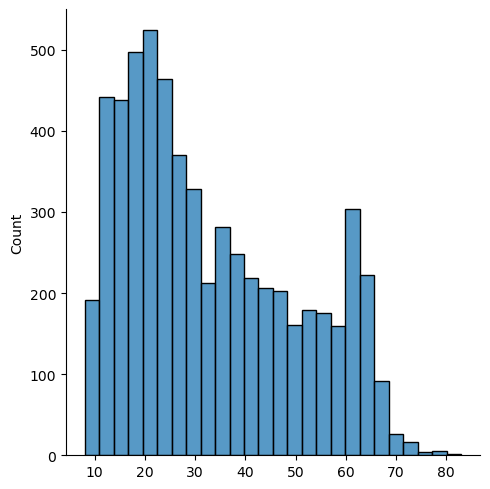

In [23]:
sns.displot([len(x) for x in train_data_tf])

In [24]:
max_len = int(np.quantile([len(x) for x in train_data_tf], 0.9))

In [25]:
max_len

60

In [26]:
train_padded = pad_sequences(sequences = train_data_tf, padding='post', maxlen=max_len)
test_padded = pad_sequences(sequences = test_data_tf, padding='post', maxlen=max_len)
val_padded = pad_sequences(sequences = val_data_tf, padding='post', maxlen=max_len)

In [27]:
print(train_padded.shape)
print(test_padded.shape)
print(val_padded.shape)

(5968, 60)
(1866, 60)
(1492, 60)


In [28]:
onehot = OneHotEncoder()

In [29]:
onehot.fit_transform(train_data[['label']])

<5968x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5968 stored elements in Compressed Sparse Row format>

In [30]:
train_labels = onehot.fit_transform(train_data[['label']]).toarray()

#### Model Testing and Evaluation

In [31]:
model = Sequential()

In [32]:
max_features = len(tokenizer.index_word)
batch_size=16
output_dim = 64
input_len = max_len

In [47]:
tokenizer.index_word

{1: '<UNK>',
 2: 'nya',
 3: 'yang',
 4: 'dan',
 5: 'di',
 6: 'saya',
 7: 'tidak',
 8: 'dengan',
 9: 'makanan',
 10: 'tempat',
 11: 'enak',
 12: 'ini',
 13: 'untuk',
 14: 'makan',
 15: 'juga',
 16: 'ada',
 17: 'ke',
 18: 'harga',
 19: 'sangat',
 20: 'dari',
 21: 'sini',
 22: 'bandung',
 23: 'menu',
 24: 'cukup',
 25: 'karena',
 26: 'banyak',
 27: 'banget',
 28: 'bisa',
 29: 'restoran',
 30: 'tapi',
 31: 'kalau',
 32: 'sudah',
 33: 'rasa',
 34: 'saja',
 35: 'itu',
 36: 'kami',
 37: 'rasanya',
 38: 'jadi',
 39: 'suasana',
 40: 'nyaman',
 41: 'buat',
 42: 'malam',
 43: 'kita',
 44: 'pelayanan',
 45: 'adalah',
 46: 'ayam',
 47: 'sekali',
 48: 'sama',
 49: 'bagus',
 50: 'nasi',
 51: 'goreng',
 52: 'pemandangan',
 53: 'seperti',
 54: 'jalan',
 55: 'datang',
 56: 'lagi',
 57: 'atau',
 58: 'lebih',
 59: 'orang',
 60: 'suka',
 61: 'satu',
 62: 'mahal',
 63: 'hanya',
 64: 'lumayan',
 65: 'ya',
 66: 'biasa',
 67: 'pilihan',
 68: 'keluarga',
 69: 'cocok',
 70: 'resto',
 71: 'terlalu',
 72: 'sampai'

In [33]:
len(tokenizer.index_word)

13609

In [34]:
output_dim

64

In [35]:
input_len

60

In [41]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.index_word)+1,
                           output_dim=output_dim, 
                           input_length=input_len))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [43]:
maximum_index_training = int(np.floor(train_padded.shape[0]/batch_size)*batch_size)
model.fit(x=train_padded[:maximum_index_training], 
          y=train_labels[:maximum_index_training],
          batch_size=batch_size, 
          epochs=20, 
          shuffle=False)

Epoch 1/20
373/373 [==============================] - 6s 13ms/step - loss: 0.5083 - accuracy: 0.7956
Epoch 2/20
373/373 [==============================] - 5s 13ms/step - loss: 0.2001 - accuracy: 0.9281
Epoch 3/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0573 - accuracy: 0.9821
Epoch 4/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0125 - accuracy: 0.9980
Epoch 5/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0035 - accuracy: 0.9995
Epoch 6/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0020 - accuracy: 0.9997
Epoch 7/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 8/20
373/373 [==============================] - 5s 14ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 9/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 10/20
373/373 [==============================] - 5s 13ms/step - loss: 0.0014 - accura

In [44]:
y_pred = model.predict(val_padded,batch_size=1)

1492/1492 [==============================] - 2s 1ms/step


In [45]:
y_pred = onehot.inverse_transform(y_pred).reshape(-1)

In [46]:
accuracy_score(y_pred=y_pred, y_true=val_data['label'])

0.8853887399463807